In [1]:
! pip install wordcloud natasha pymystem3

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 45.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 85.7 MB/s eta 0:00:00:00:0100:01
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26095 sha256=901946920b3058944cdbedd7ab2e59e12070347e27b90a4d303205d0877cdadb
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

grouped_df = pd.read_csv('/kaggle/input/gdfggdf/grouped_df.csv').iloc[:, 1:]
display(grouped_df)

,Theme,summary
0,A/B-тестирование (лекции),"1. Понравился преподаватель, который хорошо и..."
1,A/B-тестирование (семинары),"1. Понравился хороший преподаватель, но хочет..."
2,Adobe Illustrator для дизайнеров,1. Понравилась Мария как преподаватель. 2. Мн...
3,Adobe Illustrator для иллюстрации,1. Не очень хорошо адаптирован под пользовате...
4,After Effects,Часть 2. 1. Очень понравился преподаватель по...
...,...,...
307,Этапы проектной работы (лекции),1. Необходимо систематизировать информацию по...
308,Этапы проектной работы (семинары),1. Нет. 2. Учебная программа не соответствует...
309,Юнит-экономика,Обучение в записи. 1. Мне больше всего понрав...
310,Юнит-экономика (лекции),"1. Понравился преподаватель, который все объя..."


In [3]:
from tqdm import tqdm
from pymystem3 import Mystem
import pandas as pd

def lemmatize_text(text):
    m = Mystem()
    lemmas = m.lemmatize(text)
    return ' '.join(lemmas)

tqdm.pandas()
grouped_df['summary_lemmatized'] = grouped_df['summary'].progress_apply(lemmatize_text)

display(grouped_df)

100%|██████████| 312/312 [04:30<00:00,  1.15it/s]


,Theme,summary,summary_lemmatized
0,A/B-тестирование (лекции),"1. Понравился преподаватель, который хорошо и...","1 . понравиться преподаватель , который ..."
1,A/B-тестирование (семинары),"1. Понравился хороший преподаватель, но хочет...","1 . понравиться хороший преподаватель ,..."
2,Adobe Illustrator для дизайнеров,1. Понравилась Мария как преподаватель. 2. Мн...,1 . понравиться мария как преподавате...
3,Adobe Illustrator для иллюстрации,1. Не очень хорошо адаптирован под пользовате...,1 . не очень хорошо адаптировать по...
4,After Effects,Часть 2. 1. Очень понравился преподаватель по...,часть 2 . 1 . очень понравиться преп...
...,...,...,...
307,Этапы проектной работы (лекции),1. Необходимо систематизировать информацию по...,1 . необходимо систематизировать информ...
308,Этапы проектной работы (семинары),1. Нет. 2. Учебная программа не соответствует...,1 . нет . 2 . учебный программа не ...
309,Юнит-экономика,Обучение в записи. 1. Мне больше всего понрав...,обучение в запись . 1 . я много вс...
310,Юнит-экономика (лекции),"1. Понравился преподаватель, который все объя...","1 . понравиться преподаватель , который ..."


In [29]:
grouped_df.drop(columns=['summary'], inplace=True)
display(grouped_df)

,Theme,summary_lemmatized
0,A/B-тестирование (лекции),"1 . понравиться преподаватель , который ..."
1,A/B-тестирование (семинары),"1 . понравиться хороший преподаватель ,..."
2,Adobe Illustrator для дизайнеров,1 . понравиться мария как преподавате...
3,Adobe Illustrator для иллюстрации,1 . не очень хорошо адаптировать по...
4,After Effects,часть 2 . 1 . очень понравиться преп...
...,...,...
307,Этапы проектной работы (лекции),1 . необходимо систематизировать информ...
308,Этапы проектной работы (семинары),1 . нет . 2 . учебный программа не ...
309,Юнит-экономика,обучение в запись . 1 . я много вс...
310,Юнит-экономика (лекции),"1 . понравиться преподаватель , который ..."


In [ ]:
nltk.download('stopwords')

In [56]:
display(grouped_df)

,Theme,summary_lemmatized
0,A/B-тестирование (лекции),"1 . понравиться преподаватель , который ..."
1,A/B-тестирование (семинары),"1 . понравиться хороший преподаватель ,..."
2,Adobe Illustrator для дизайнеров,1 . понравиться мария как преподавате...
3,Adobe Illustrator для иллюстрации,1 . не очень хорошо адаптировать по...
4,After Effects,часть 2 . 1 . очень понравиться преп...
...,...,...
307,Этапы проектной работы (лекции),1 . необходимо систематизировать информ...
308,Этапы проектной работы (семинары),1 . нет . 2 . учебный программа не ...
309,Юнит-экономика,обучение в запись . 1 . я много вс...
310,Юнит-экономика (лекции),"1 . понравиться преподаватель , который ..."


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import json

# Ensure NLTK stopwords are available
nltk.download('stopwords')

# Initialize the lemmatizer outside the function to avoid reloading it each time
m = Mystem()

def flatten_json_summary(json_data):
    data = json.loads(json_data)
    theme = data.get('question_1')
    summary = ' '.join(value for key, value in data.items() if key != 'question_1')
    return theme, summary

def lemmatize_text(text):
    lemmas = m.lemmatize(text)
    return ' '.join(lemmas)

def process_and_update_df(df, json_data):
    # Extract theme and summary from JSON data
    theme, summary_text = flatten_json_summary(json_data)
    new_row = {'Theme': theme, 'summary': summary_text}
    
    # Add new row to DataFrame
    new_row_df = pd.DataFrame([new_row])
    updated_df = pd.concat([df, new_row_df], ignore_index=True)
    
    # Filter DataFrame for the specific theme and group if needed
    theme_df = updated_df[updated_df['Theme'] == theme]
    grouped_df = theme_df.groupby('Theme')['summary'].apply(' '.join).reset_index()

    # Lemmatize the aggregated summaries
    tqdm.pandas()
    grouped_df['summary_lemmatized'] = grouped_df['summary'].progress_apply(lemmatize_text)

    return grouped_df

def calculate_tfidf_scores(df):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['summary_lemmatized'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    word_scores = dict(zip(feature_names, tfidf_matrix.max(0).toarray()[0]))
    frequent_words = {word for word, score in word_scores.items() if score > 0.6}
    
    russian_stopwords = set(stopwords.words('russian'))
    additional_stopwords = {"который", 'очень', 'часть', 'ваш', 'мочь', 'первый', 'второй'}
    all_stopwords = russian_stopwords.union(additional_stopwords).union(frequent_words)
    
    return all_stopwords

def generate_word_cloud(summary, stopwords):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(summary)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def pipeline(df_path, json_data):
    # Load and display the existing DataFrame
    df = pd.read_csv(df_path).iloc[:, 1:]
    print("Original DataFrame:")
    display(df)

    # Process new data and update DataFrame
    grouped_df = process_and_update_df(df, json_data)
    print("Updated DataFrame with New Data Grouped by Theme:")
    display(grouped_df)

    # Calculate stopwords including high TF-IDF scores
    stopwords = calculate_tfidf_scores(grouped_df)

    # Generate word cloud for the updated theme
    for index, row in grouped_df.iterrows():
        print(f"Generating Word Cloud for Theme: {row['Theme']}")
        generate_word_cloud(row['summary_lemmatized'], stopwords)

# Example usage
json_data = '{"question_1":"After Effects","question_2":"Лектор имел забавную прическу, что отвлекало, но было весело.","question_3":"Да, особенно когда кот лектора прыгнул на стол.","question_4":"Может, начать с курса стрижки для лекторов? И убрать котов из кадра.","question_5":"Как сделать так, чтобы коты не мешали учёбе."}'
pipeline('/kaggle/input/gdfggdf/grouped_df.csv', json_data)

ModuleNotFoundError: No module named 'pymystem3'

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Original DataFrame:


,Theme,summary
0,A/B-тестирование (лекции),"1. Понравился преподаватель, который хорошо и..."
1,A/B-тестирование (семинары),"1. Понравился хороший преподаватель, но хочет..."
2,Adobe Illustrator для дизайнеров,1. Понравилась Мария как преподаватель. 2. Мн...
3,Adobe Illustrator для иллюстрации,1. Не очень хорошо адаптирован под пользовате...
4,After Effects,Часть 2. 1. Очень понравился преподаватель по...
...,...,...
307,Этапы проектной работы (лекции),1. Необходимо систематизировать информацию по...
308,Этапы проектной работы (семинары),1. Нет. 2. Учебная программа не соответствует...
309,Юнит-экономика,Обучение в записи. 1. Мне больше всего понрав...
310,Юнит-экономика (лекции),"1. Понравился преподаватель, который все объя..."


100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

Updated DataFrame with New Data Grouped by Theme:


,Theme,summary,summary_lemmatized
0,After Effects,Часть 2. 1. Очень понравился преподаватель по...,часть 2 . 1 . очень понравиться преп...


Generating Word Cloud for Theme: After Effects


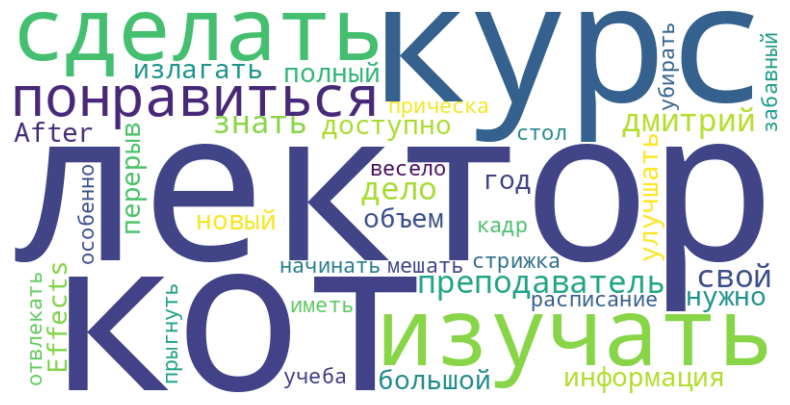

OSError: [Errno 30] Read-only file system: '/kaggle/input/gdfggdf/grouped_df.csv'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import json

# Ensure NLTK stopwords are available
nltk.download('stopwords')

# Initialize the lemmatizer outside the function to avoid reloading it each time
m = Mystem()

def flatten_json_summary(json_data):
    data = json.loads(json_data)
    theme = data.get('question_1')
    summary = ' '.join(value for key, value in data.items() if key != 'question_1')
    return theme, summary

def lemmatize_text(text):
    lemmas = m.lemmatize(text)
    return ' '.join(lemmas)

def process_and_update_df(df, json_data):
    # Extract theme and summary from JSON data
    theme, summary_text = flatten_json_summary(json_data)
    new_row = {'Theme': theme, 'summary': summary_text}
    
    # Add new row to DataFrame
    new_row_df = pd.DataFrame([new_row])
    updated_df = pd.concat([df, new_row_df], ignore_index=True)
    
    # Filter DataFrame for the specific theme and group if needed
    theme_df = updated_df[updated_df['Theme'] == theme]
    grouped_df = theme_df.groupby('Theme')['summary'].apply(' '.join).reset_index()

    # Lemmatize the aggregated summaries
    tqdm.pandas()
    grouped_df['summary_lemmatized'] = grouped_df['summary'].progress_apply(lemmatize_text)

    return grouped_df

def calculate_tfidf_scores(df):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['summary_lemmatized'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    word_scores = dict(zip(feature_names, tfidf_matrix.max(0).toarray()[0]))
    frequent_words = {word for word, score in word_scores.items() if score > 0.6}
    
    russian_stopwords = set(stopwords.words('russian'))
    additional_stopwords = {"который", 'очень', 'часть', 'ваш', 'мочь', 'первый', 'второй'}
    all_stopwords = russian_stopwords.union(additional_stopwords).union(frequent_words)
    
    return all_stopwords

def generate_word_cloud(summary, stopwords):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(summary)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def pipeline(df_path, json_data, save_path):
    # Load and display the existing DataFrame
    df = pd.read_csv(df_path).iloc[:, 1:]
    print("Original DataFrame:")
    # display(df)

    # Process new data and update DataFrame
    grouped_df = process_and_update_df(df, json_data)
    print("Updated DataFrame with New Data Grouped by Theme:")
    # display(grouped_df)

    # Calculate stopwords including high TF-IDF scores
    stopwords = calculate_tfidf_scores(grouped_df)

    # Generate word cloud for the updated theme
    for index, row in grouped_df.iterrows():
        print(f"Generating Word Cloud for Theme: {row['Theme']}")
        generate_word_cloud(row['summary_lemmatized'], stopwords)

    # Save the updated DataFrame to CSV
    grouped_df.to_csv(save_path, index=False)
    print(f"DataFrame saved to {save_path}")

# Example usage
json_data = '{"question_1":"After Effects","question_2":"Лектор имел забавную прическу, что отвлекало, но было весело.","question_3":"Да, особенно когда кот лектора прыгнул на стол.","question_4":"Может, начать с курса стрижки для лекторов? И убрать котов из кадра.","question_5":"Как сделать так, чтобы коты не мешали учёбе."}'
pipeline('/kaggle/input/gdfggdf/grouped_df.csv', json_data, '/kaggle/input/gdfggdf/grouped_df.csv')